# Multiple Linear Regression - Luggage Bags Cost Prediction

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set(color_codes=True)

In [ ]:
data = pd.read_csv("Data_miniproject.csv")

data.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
data.describe() #checking for various stats on data

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
data.dtypes #All the datatypes are floats

Cost       float64
Weight     float64
Weight1    float64
Length     float64
Height     float64
Width      float64
dtype: object

In [ ]:
data.isnull().sum() #no null values. no additional manupulation required.

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64

In [ ]:
data.columns

Index(['Cost', 'Weight', 'Weight1', 'Length', 'Height', 'Width'], dtype='object')

In [ ]:
# Cost potentially depends on Weight, Weight1, Length, Height, Width. These are the weights for the linear regression model.

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.describe() # implies no duplicate values as the count remains the same.

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


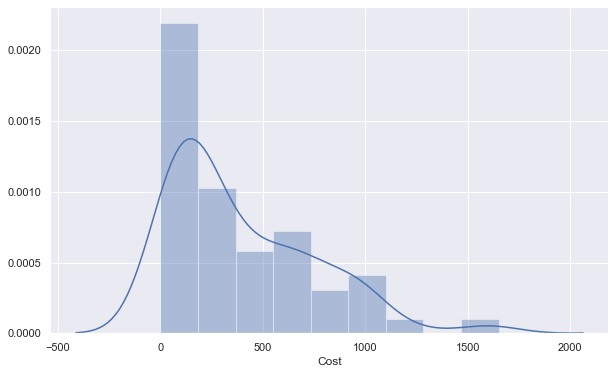

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(data['Cost']) # understandinf where the cost generally lies.

We can see that the cost mostly lies between 0-500 and the number of bags having cost higher 
is gradually decreasing with the price increasing

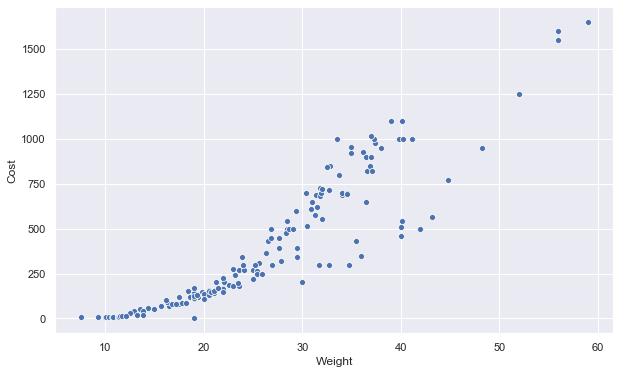

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data['Weight'],data['Cost'])

Clearly indicates that cost is dependent on weight. Cost increases as weight increases.

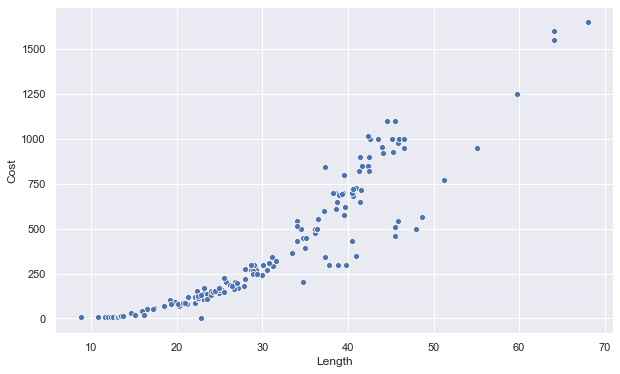

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data['Length'],data['Cost'])

Again, this clearly indicates that cost is dependent on length. Cost increases as length increases.

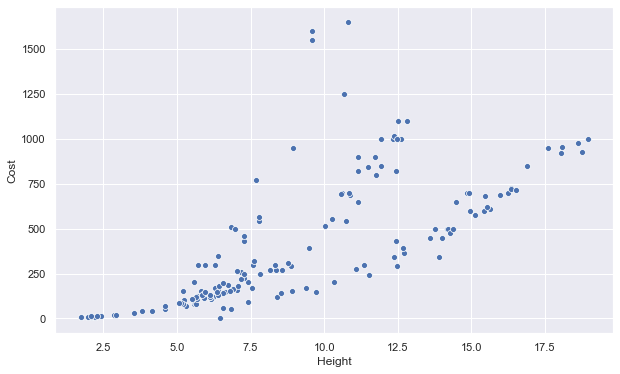

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data['Height'],data['Cost'])

From this graph we cannot clearly conclude if the Cost depends on the Height of the Bag. This needs to be further analysed.

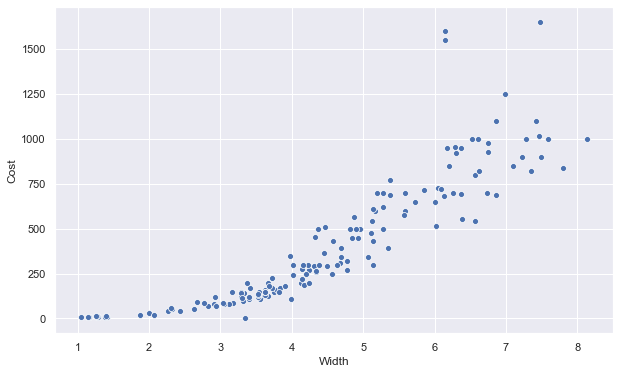

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data['Width'],data['Cost'])

This again indicates that there is a relation between cost and width of the bag. Its not perfectly linear, as there are some outliers. However, cost is definately dependent on width of the bag.

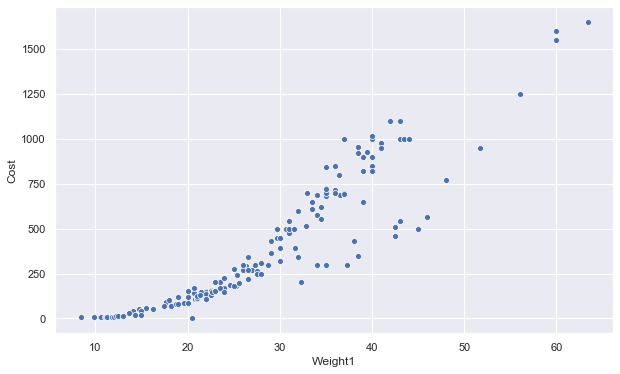

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data['Weight1'],data['Cost'])

This again indicates that there is a relation between cost and Expanded Weight of the bag. Its not perfectly linear, as there are some outliers. However, cost is definately dependent on width of the bag.

In [ ]:
# Identifying the outliers in each of these categories

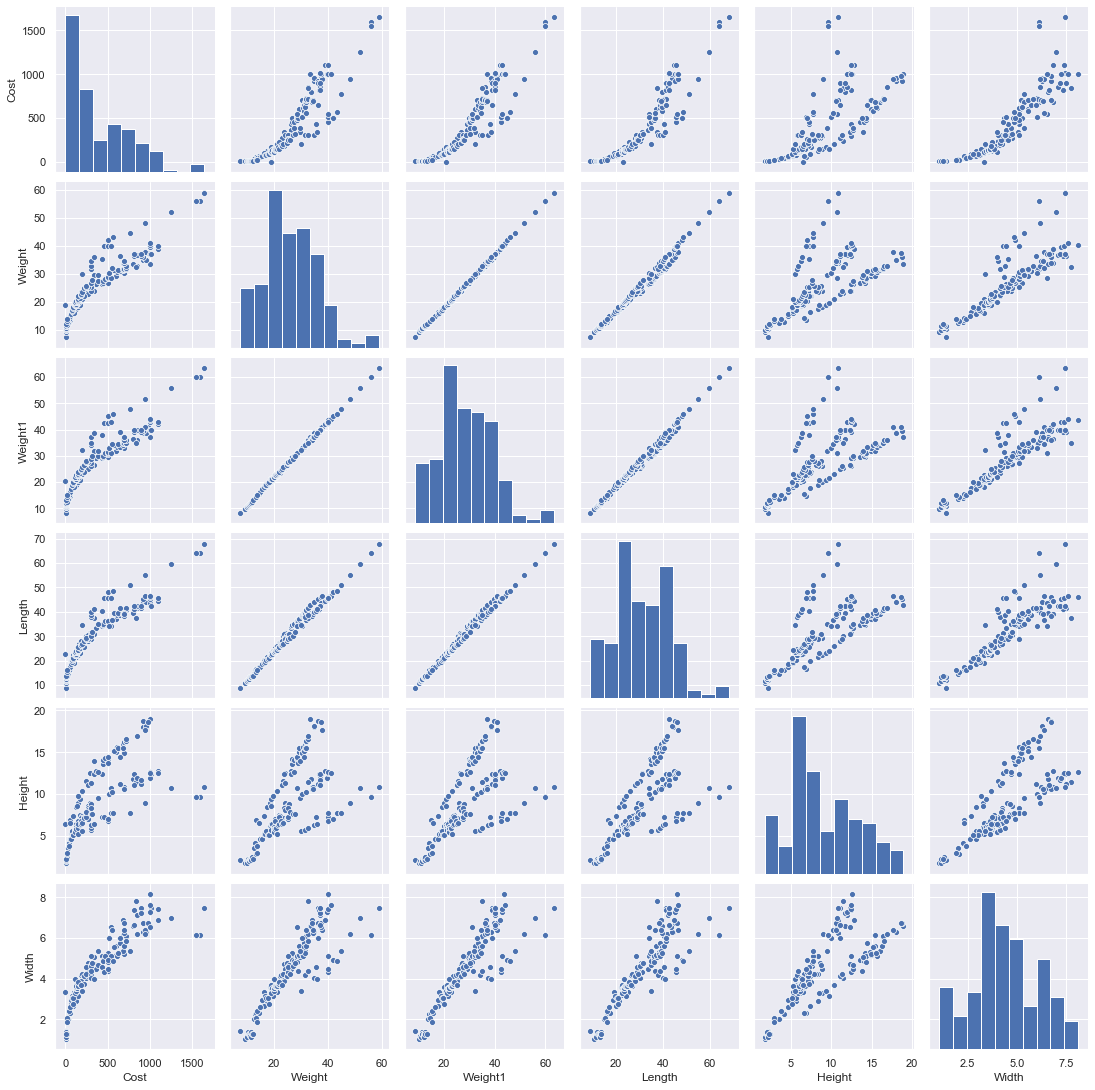

In [ ]:
sns.pairplot(data)
plt.show()

Generating the correlation diagram to check how each of these relate to the others.

,Cost,Weight,Weight1,Length,Height,Width
Cost,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Weight,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Weight1,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


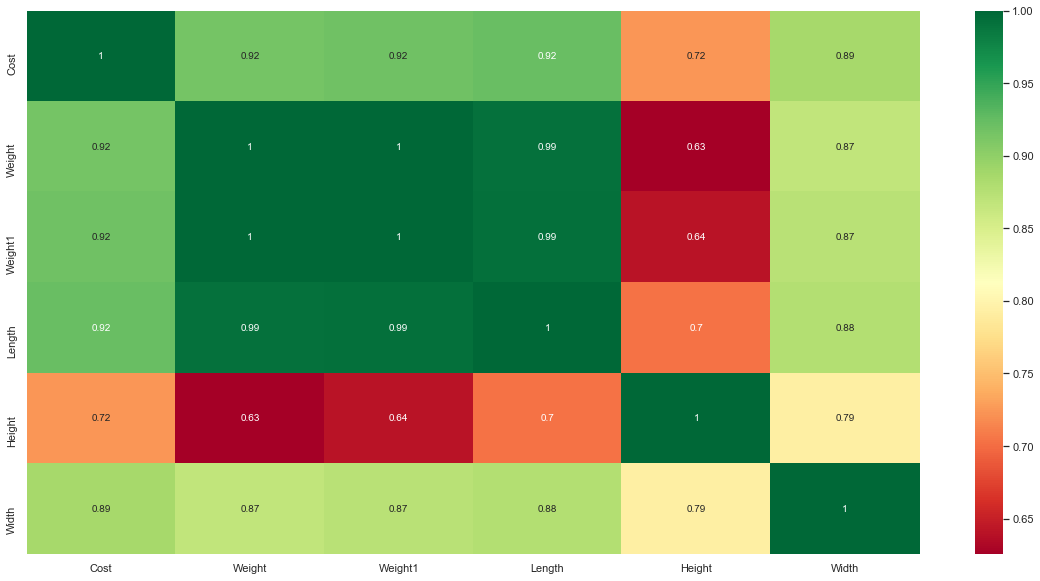

In [ ]:
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c,cmap=plt.cm.RdYlGn,annot=True)
c

Most attributes here show that they directly influence the cost of the bag. Color is some shade of green.

However, here, we can again see that Cost is not as dependent on Height as the other features.

The next step is to look for the outliers by generating boxplots for all attributes.

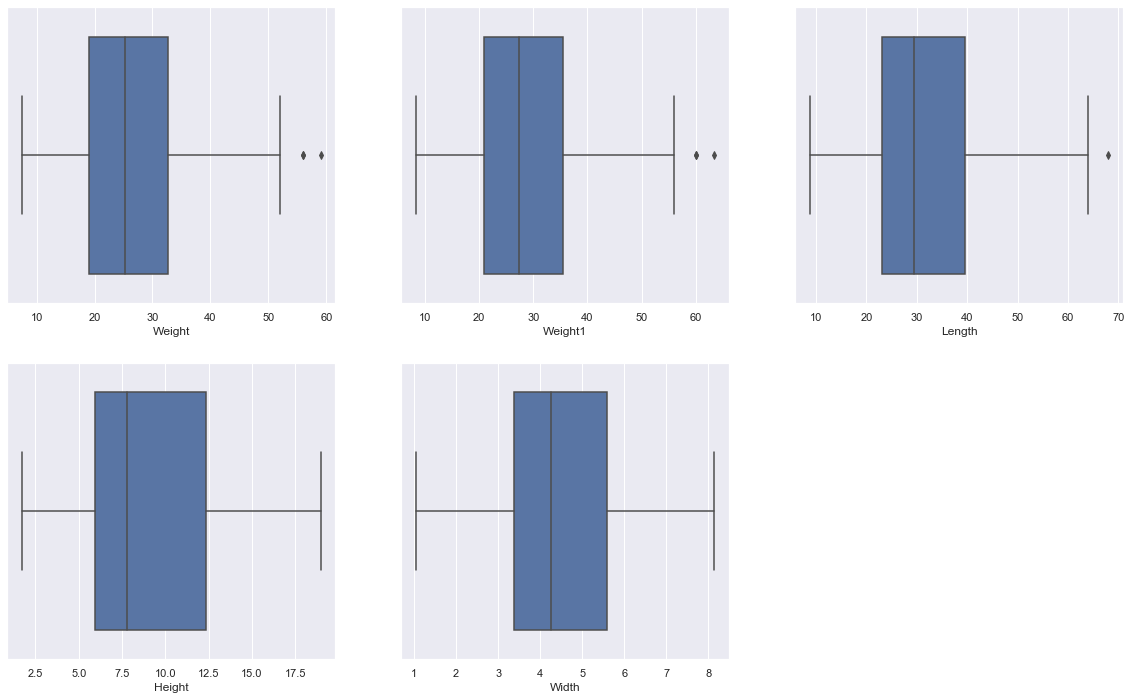

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(data['Weight'])
plt.subplot(2,3,2)
sns.boxplot(data['Weight1'])
plt.subplot(2,3,3)
sns.boxplot(data['Length'])
plt.subplot(2,3,4)
sns.boxplot(data['Height'])
plt.subplot(2,3,5)
sns.boxplot(data['Width'])
plt.show()
#'Weight', 'Weight1', 'Length', 'Height', 'Width'

Looks like there are two outliers each among Weight and Weight1 and one outlier in the lengths. Identifying them by IQR or H-Spread:

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Cost       530.00000
Weight      13.65000
Weight1     14.50000
Length      16.50000
Height       6.42110
Width        2.19885
dtype: float64


Using the above IQR scores, we can remove the outliers:

In [ ]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(156, 6)

3 Outliers are removed.

In [ ]:
data_out.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


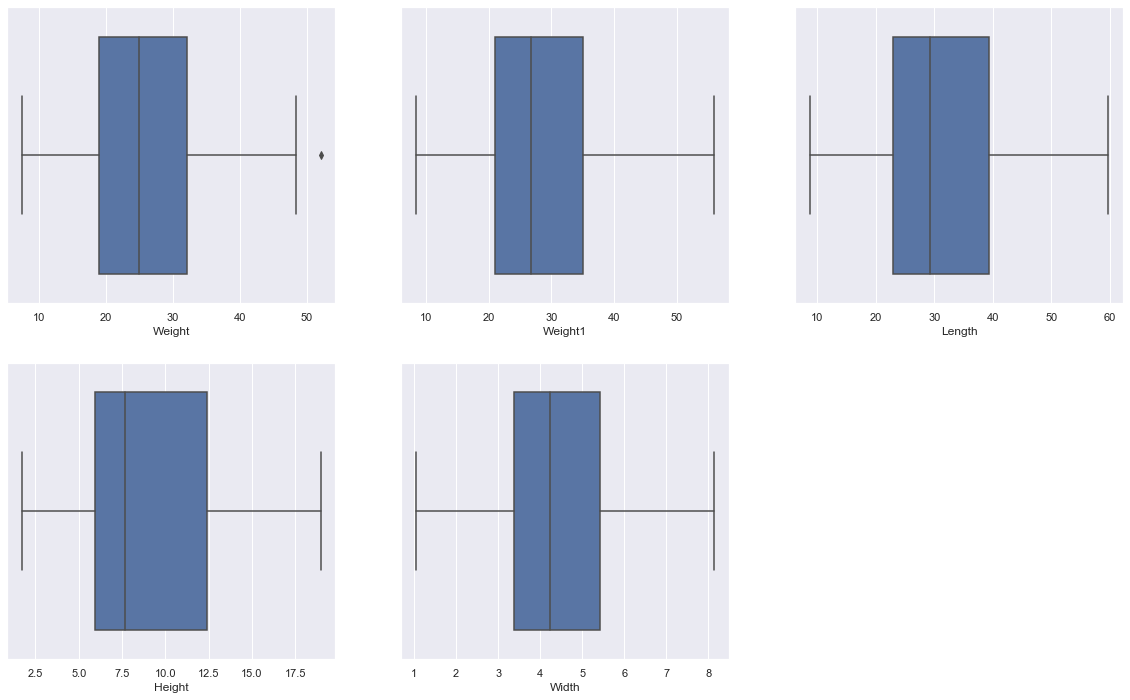

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(data_out['Weight'])
plt.subplot(2,3,2)
sns.boxplot(data_out['Weight1'])
plt.subplot(2,3,3)
sns.boxplot(data_out['Length'])
plt.subplot(2,3,4)
sns.boxplot(data_out['Height'])
plt.subplot(2,3,5)
sns.boxplot(data_out['Width'])
plt.show()

We can see there is still a outlier on the plot for Weight.

This can be removed by retrying the method for removing outliers using IQR.

In [ ]:
Q1 = data_out.quantile(0.25)
Q3 = data_out.quantile(0.75)
IQR = Q3 - Q1
data_out1 = data_out[~((data_out < (Q1 - 1.5 * IQR)) |(data_out > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out1.shape

(155, 6)

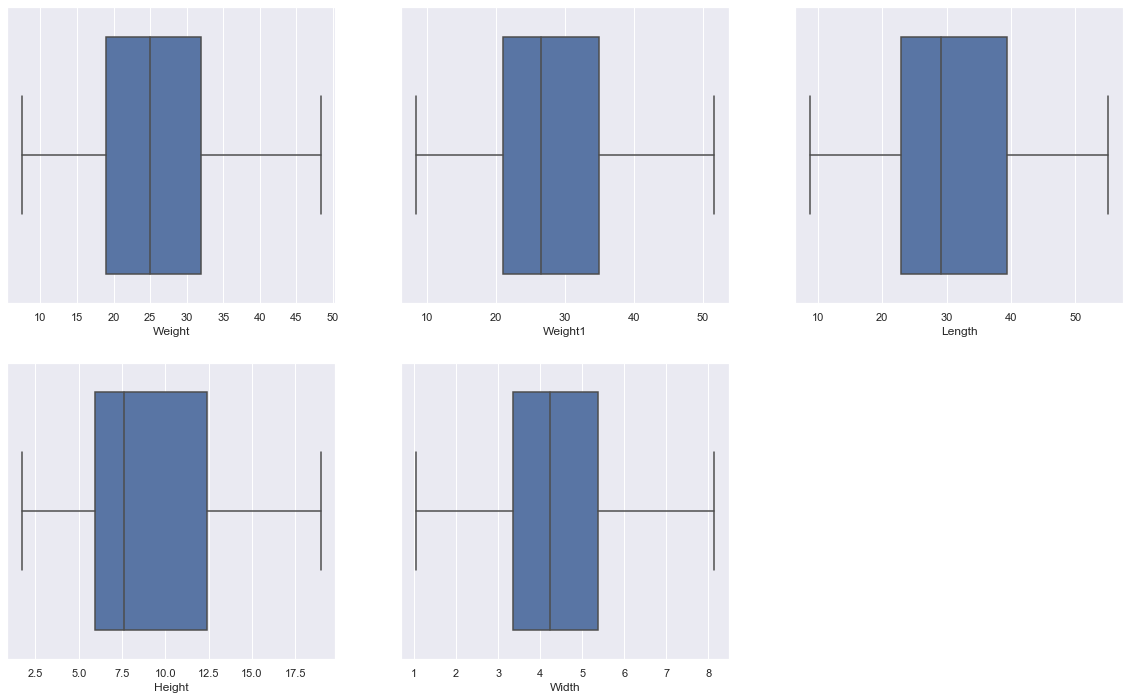

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(data_out1['Weight'])
plt.subplot(2,3,2)
sns.boxplot(data_out1['Weight1'])
plt.subplot(2,3,3)
sns.boxplot(data_out1['Length'])
plt.subplot(2,3,4)
sns.boxplot(data_out1['Height'])
plt.subplot(2,3,5)
sns.boxplot(data_out1['Width'])
plt.show()

We can now see that the outlier is removed.

In [ ]:
data_out1.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,369.573548,25.485806,27.604516,30.383226,8.939934,4.358886
std,312.685376,8.897865,9.555969,10.468442,4.336074,1.664295
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,22.950000,5.926950,3.363600
50%,270.000000,25.000000,26.500000,29.200000,7.615600,4.239000
75%,605.000000,32.000000,35.000000,39.350000,12.379300,5.373200
max,1100.000000,48.300000,51.700000,55.100000,18.957000,8.142000


We see that the minimum cost is 0. Which looks like somthing thats not possible.

In [ ]:
data_out1[data_out1.Cost == 0]

,Cost,Weight,Weight1,Length,Height,Width
40,0.0,19.0,20.5,22.8,6.4752,3.3516


Row 40 has a cost 0. It does not fit into the costing of bags. Being an outlier, it can also be removed.

In [ ]:
nonzero_vals = data_out1[data_out1.Cost != 0]
nonzero_vals.shape

(154, 6)

Checking if this outlier has caused any impact to stats generate by using describe()

In [ ]:
nonzero_vals.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,371.973377,25.527922,27.650649,30.432468,8.955938,4.365427
std,312.270189,8.911383,9.569814,10.484572,4.345625,1.667725
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.025000,21.000000,23.125000,5.922225,3.380625
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,607.500000,32.000000,35.000000,39.375000,12.380050,5.374600
max,1100.000000,48.300000,51.700000,55.100000,18.957000,8.142000


The mean has increased on Cost. However, this does not seem to have a large impact on the dataset. The alternative method would be replace the 0 value by mean.

Reconfirming that by removing the row with 0 new outliers are not introduced. This can be done by generating the boxplots again.

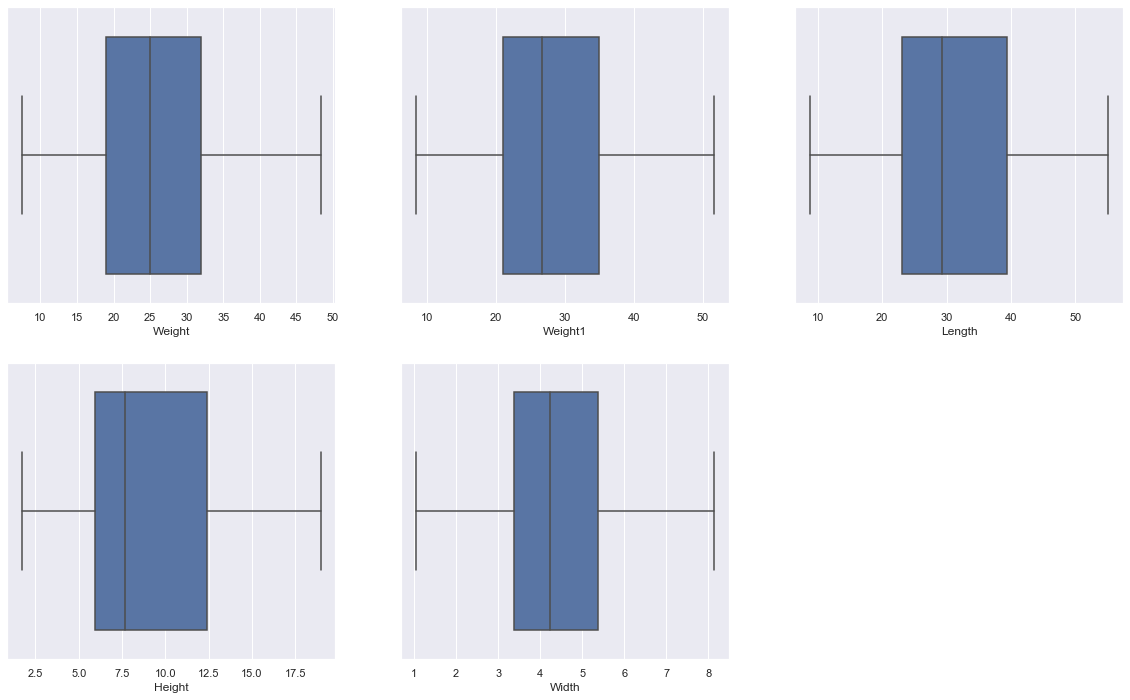

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(nonzero_vals['Weight'])
plt.subplot(2,3,2)
sns.boxplot(nonzero_vals['Weight1'])
plt.subplot(2,3,3)
sns.boxplot(nonzero_vals['Length'])
plt.subplot(2,3,4)
sns.boxplot(nonzero_vals['Height'])
plt.subplot(2,3,5)
sns.boxplot(nonzero_vals['Width'])
plt.show()

The next step would be to identify the features of the bag that determine the cost. For this the pair plots and heatmap can be generated on the new dataset.

Pairplots:

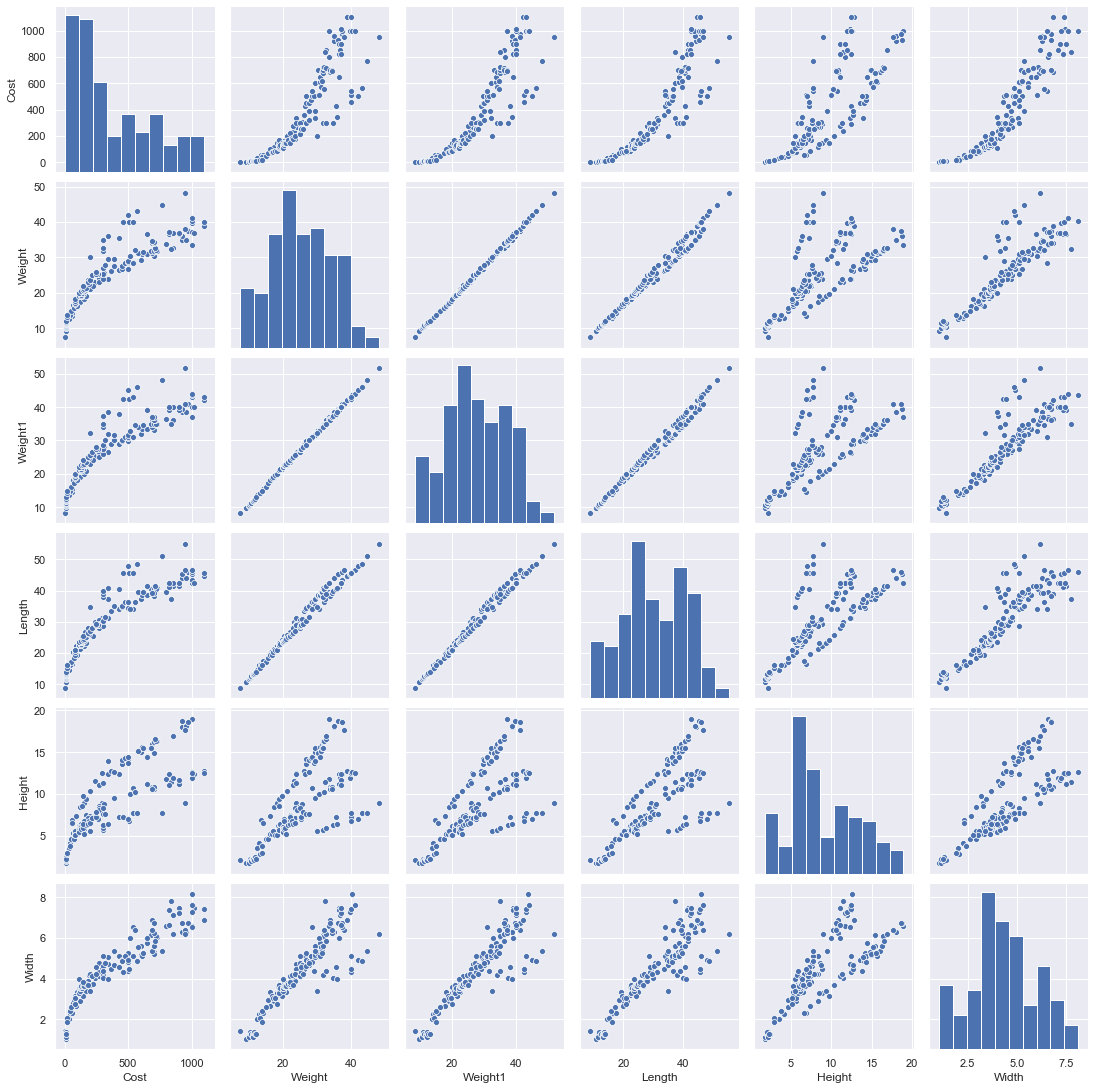

In [ ]:
sns.pairplot(nonzero_vals)
plt.show()

,Cost,Weight,Weight1,Length,Height,Width
Cost,1.000000,0.890155,0.894373,0.902653,0.815435,0.926332
Weight,0.890155,1.000000,0.999384,0.990171,0.687261,0.890990
Weight1,0.894373,0.999384,1.000000,0.992741,0.703293,0.897611
Length,0.902653,0.990171,0.992741,1.000000,0.767474,0.898065
Height,0.815435,0.687261,0.703293,0.767474,1.000000,0.802828
Width,0.926332,0.890990,0.897611,0.898065,0.802828,1.000000


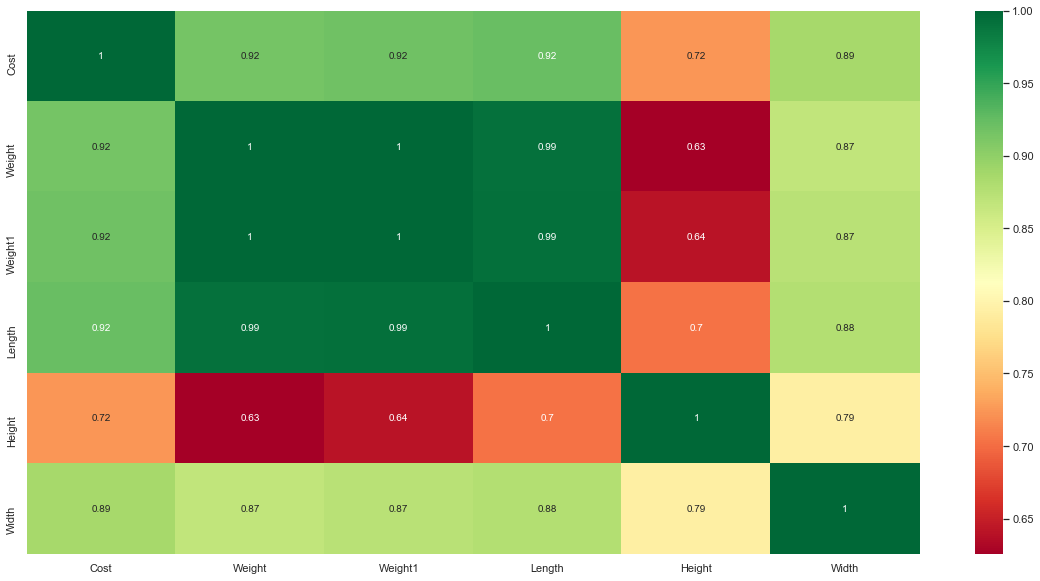

In [ ]:
plt.figure(figsize=(20,10))
c1= nonzero_vals.corr()
sns.heatmap(c,cmap=plt.cm.RdYlGn,annot=True)
c1

Again, clearly, Cost is not as dependent on Height as the other features. This could be due to some outliers in height, or, height is a feature that is not useful in predicting the cost.

Practically speaking as well. Bags that are compact but can carry similar load are more preferred, this could also result in the price to be higher.

Reindexing the dataframe as some of the rows are removed.

In [ ]:
nonzero_vals.reset_index(inplace = True) 
nonzero_vals

,index,Cost,Weight,Weight1,Length,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
149,154,12.2,11.5,12.2,13.4,2.0904,1.3936
150,155,13.4,11.7,12.4,13.5,2.4300,1.2690
151,156,12.2,12.1,13.0,13.8,2.2770,1.2558
152,157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
nonzero_vals.columns

Index(['index', 'Cost', 'Weight', 'Weight1', 'Length', 'Height', 'Width'], dtype='object')

Generating Data Set for Linear Regression.

In [ ]:
nonzero_vals.columns
features = ['Weight', 'Weight1', 'Length', 'Height', 'Width']

In [ ]:
X_initial = nonzero_vals.loc[:,features]
y_initial = nonzero_vals['Cost']

In [ ]:
from sklearn.preprocessing import StandardScaler
y = y_initial.values.reshape(-1,1)
column_names= X_initial.columns
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X_initial),columns=column_names)

## Using sklearn Linear Regression (as a point of reference)

Considering all the features: 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model, using training data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# The coefficients
# print the parameter theta1
print('Coefficient = w = ', model.coef_)
# print the parameter theta0
print('Intercept = w0 = ', model.intercept_)

Coefficient = w =  [[ 966.50743372 -504.15437557 -396.56199568  161.4358272   108.26126724]]
Intercept = w0 =  [372.08651124]


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
#Mean squared error regression loss

n_mse = mean_squared_error(y_test, y_pred)
print("Mean squared error = %.2f" % n_mse)



n_rmse = mean_squared_error(y_test, y_pred , squared=False)
print("Root mean squared error = %.2f" %n_rmse)

# Explained variance score: 1 is perfect prediction.
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0, a
# a constant model that always predicts the expected value of y, disregarding the input features, 
#would get a R^2 score of 0.0.
n_r2 = r2_score(y_test, y_pred)

print('Variance score = %.2f' % n_r2)

Mean squared error = 9552.62
Root mean squared error = 97.74
Variance score = 0.90


Removing Height as a feature to check if that is a better model:

In [ ]:
features1 = ['Weight', 'Weight1', 'Length',  'Width']
X1 = nonzero_vals.loc[:,features1]
y1 = nonzero_vals['Cost']
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
# Create the model
model1 = LinearRegression()
# Train the model, using training data set
model1.fit(X_train1, y_train1)
# The coefficients
print('Coefficient = w = ', model1.coef_)
print('Intercept = w0 = ', model1.intercept_)

Coefficient = w =  [ 49.58982248 -63.2112197   24.46726934 125.23999374]
Intercept = w0 =  -437.0052424487202


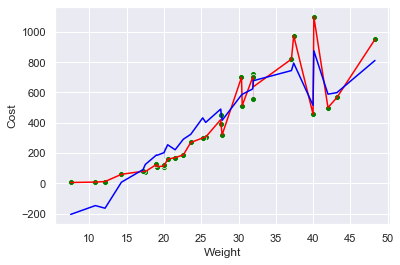

In [ ]:
y_pred1 = model1.predict(X_test1)
sns.scatterplot(X_test1['Weight'], y_test1, color='green')
sns.lineplot(X_test1['Weight'], y_test1, color='red')
sns.lineplot(X_test1['Weight'], y_pred1, color='blue')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
#Mean squared error regression loss


print("Mean squared error = %.2f" % mean_squared_error(y_test1, y_pred1))


print("Root mean squared error = %.2f" %mean_squared_error(y_test1, y_pred1 , squared=False))

# Explained variance score: 1 is perfect prediction.
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0, a
# a constant model that always predicts the expected value of y, disregarding the input features, 
#would get a R^2 score of 0.0.

print('Variance score = %.2f' % r2_score(y_test1, y_pred1))

Mean squared error = 11678.68
Root mean squared error = 108.07
Variance score = 0.88


Comparing the MSE we can see that the Height as a feature determines the value of the cost as holding the value has resulted in a higher varience score and lower RMSE value.

## Using Gradient Descent

Defining the cost function:

In [ ]:
def cost_func(n, X, y):
    m = len(y)
    pred_vals = X.dot(n)
    cost = (1/2)*m * np.sum(np.square(pred_vals-y))
    return cost

In [ ]:
def grad_desc(X, y, n, learn_rate = 0.01, iterations = 200):
    m = len(y)
    cost_hist = np.zeros(iterations)
    n_hist = np.zeros((iterations,6))
    for i in range(iterations):
        pred = np.dot(X, n)
        n = n - (1/m)*learn_rate*(X.T.dot((pred-y)))
        n_hist[i,:] = n.T
        cost_hist[i] = cost_func(n, X, y)
    return n, cost_hist, n_hist

In [ ]:
lr = 0.1
#n_iter = 200000
n = np.random.randn(6,1)
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
gd_results = pd.DataFrame(columns=['Iterations', 'r2_value'])
for iters in range(10000, 200000, 10000):
    #step size in iterations is only for visualization.
    #identifying the ideal number of iterations for the function to work in the most efficient way as compared to the standard results received from sklearn
    #range of this function is retricted and step size is added to reduce the run time as result is known.
    n, cost_hist, n_hist = grad_desc(X_b, y_train, n, lr, iters)
    gd_y_pred = n[0][0] + X_test["Weight"]*n[1][0] + X_test["Weight1"]*n[2][0] + X_test["Length"]*n[3][0] + X_test["Height"]*n[4][0] +X_test["Width"]*n[5][0]
    #comparing the score results received from sklearn result and using it as a stopping/ limiting parameter.
    gd_results = gd_results.append(pd.Series([iters,r2_score(y_test, gd_y_pred)], index=gd_results.columns), ignore_index=True)
    if round(r2_score(y_test, gd_y_pred), 2) >=0.9 and round(mean_squared_error(y_test, gd_y_pred, squared=False),2) <=97.74:
        print("Iterations used in the range (1,200000): {:d}".format(iters))
        print("w0: {:0.3f},\nw1: {:0.3f},\nw2: {:0.3f},\nw3: {:0.3f},\nw4: {:0.3f} and\nw5: {:0.3f}".format(n[0][0], n[1][0], n[2][0], n[3][0], n[4][0], n[5][0]))
        mse = '{:0.2f}'.format(cost_hist[-1])
        gd_mse = mean_squared_error(y_test, gd_y_pred)
        gd_rmse = mean_squared_error(y_test, gd_y_pred , squared=False)
        gd_r2 =  r2_score(y_test, gd_y_pred)
        print("Mean Squared Error of training data: " +mse+"\n")
        print("Mean squared error = %.2f" % mean_squared_error(y_test, gd_y_pred))
        print("Root mean squared error = %.2f" %mean_squared_error(y_test, gd_y_pred , squared=False))
        print('Variance score = %.2f' % r2_score(y_test, gd_y_pred))
        break
        


Iterations used in the range (1,200000): 60000
w0: 372.087,
w1: 966.231,
w2: -503.842,
w3: -396.592,
w4: 161.433 and
w5: 108.256
Mean Squared Error of training data: 66481685.81

Mean squared error = 9552.83
Root mean squared error = 97.74
Variance score = 0.90


Visualizing the data:

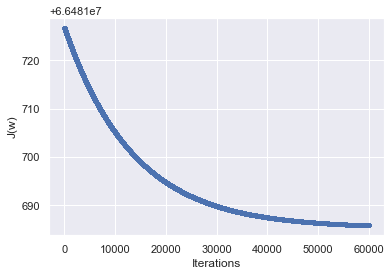

In [ ]:
fig,ax = plt.subplots(figsize=(6,4))

ax.set_ylabel('J(w)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iters),cost_hist,'b.')

Equation from Gradient Descent Algorithm is Cost  = w0+ w1*Weight + w2*Weight1 + w3*Length + w4* Height + w5*Width

Generating predicted y with the model parameters:

gd_y_pred = n[0][0] + X_test["Weight"]*n[1][0] + X_test["Weight1"]*n[2][0] + X_test["Length"]*n[3][0] + X_test["Height"]*n[4][0] +X_test["Width"]*n[5][0]

Comparing r2 score with icreasing number of iterations:

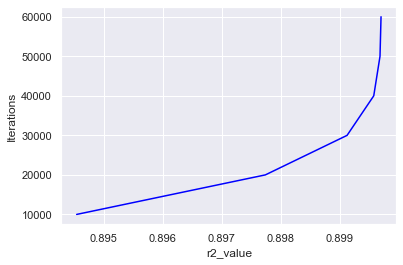

In [ ]:
sns.lineplot(gd_results['r2_value'], gd_results['Iterations'], color='blue')

## Using Stochastic Gradient Descent

In [ ]:
def stoc_grad_desc(X, y, n, learn_rate = 0.01, start_iter=0, iterations = 200):
    m = len(y)
    cost_hist = np.zeros(iterations)
    n_hist = np.zeros((iterations,6))
    for i in range(iterations):
        cost = 0.0
        for r in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            pred = np.dot(X_i, n)
            n = n - learn_rate*(X_i.T.dot((pred-y_i)))
            cost += cost_func(n, X_i, y_i)
        cost_hist[i] = cost
    return n, cost_hist

In [ ]:
lr_s = 0.1
n_s = np.random.randn(6,1)
X_b_s = np.c_[np.ones((len(X_train), 1)), X_train]

sgd_results = pd.DataFrame(columns=['Iterations', 'r2_value'])
for iters in range(1, 1000):
    #identifying the ideal number of iterations to 
    #range of this function is retricted to reduce the run time as result is known. Initially it was set to 1-5000
    n_s, cost_hist_s = stoc_grad_desc(X_b_s, y_train, n_s, lr_s, iters)
    sgd_y_pred = n_s[0][0] + X_test["Weight"]*n_s[1][0] + X_test["Weight1"]*n_s[2][0] + X_test["Length"]*n_s[3][0] + X_test["Height"]*n_s[4][0] +X_test["Width"]*n_s[5][0]
    #comparing the score to 0.9 as it is received from sklearn result and using it as a stopping/ limiting parameter.
    sgd_results = sgd_results.append(pd.Series([iters,r2_score(y_test, sgd_y_pred)], index=sgd_results.columns), ignore_index=True) 
    if round(r2_score(y_test, sgd_y_pred),2) >=0.9 and round(mean_squared_error(y_test, sgd_y_pred, squared=False),2) < 97.74:
        n_iter_s = iters
        print("Iterations used in the range (1,5000): {:d}".format(iters))
        print("w0: {:0.3f},\nw1: {:0.3f},\nw2: {:0.3f},\nw3: {:0.3f},\nw4: {:0.3f} and\nw5: {:0.3f}".format(n_s[0][0], n_s[1][0], n_s[2][0], n_s[3][0], n_s[4][0], n_s[5][0]))
        mse = '{:0.2f}'.format(cost_hist_s[-1])
        print("Mean Squared Error of training data: " +mse+"\n")
        sgd_mse = mean_squared_error(y_test, sgd_y_pred)
        sgd_rmse = mean_squared_error(y_test, sgd_y_pred , squared=False)
        sgd_r2 =  r2_score(y_test, sgd_y_pred)
        print("Mean squared error = %.2f" % sgd_mse )
        print("Root mean squared error = %.2f" %sgd_rmse)
        print('Variance score = %.2f' %sgd_r2)
        break

Iterations used in the range (1,5000): 254
w0: 368.499,
w1: 978.475,
w2: -485.503,
w3: -428.245,
w4: 169.184 and
w5: 100.895
Mean Squared Error of training data: 286144.02

Mean squared error = 9489.61
Root mean squared error = 97.41
Variance score = 0.90


Relating r2 score with iterations:

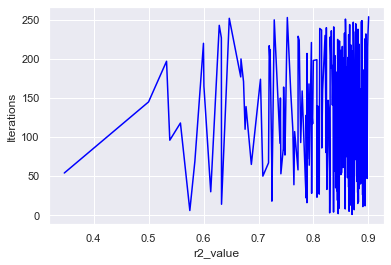

In [ ]:
sns.lineplot(sgd_results['r2_value'], sgd_results['Iterations'], color='blue')

## Using Mini Batch Gradient Descent

In [ ]:
def minib_grad_desc(X, y, n, learn_rate = 0.01, iterations = 200, batch_size=5):
    m = len(y)
    cost_hist = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for r in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0, m, batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            #X_i = np.c_[np.ones(len(X_i)),X_i]
            
            pred = np.dot(X_i, n)
            
            n = n - (1/batch_size)*learn_rate*(X_i.T.dot((pred-y_i)))
            cost += cost_func(n, X_i, y_i)
        cost_hist[r] = cost
    return n, cost_hist

In [ ]:
lr_m = 0.1
#n_iter_m = 100000
n_m = np.random.randn(6,1)
X_b_m = np.c_[np.ones((len(X_train), 1)), X_train]
mgd_results = pd.DataFrame(columns=['Iterations', 'r2_value'])

for iters in range(1, 500):
    #identifying the ideal number of iterations to 
    #range of this function is retricted to reduce the run time as result is known. Initially it was set to 1-5000
    n_m, cost_hist_m = minib_grad_desc(X_b_m, y_train, n_m, lr_m, iters,5)
    mgd_y_pred = n_m[0][0] + X_test["Weight"]*n_m[1][0] + X_test["Weight1"]*n_m[2][0] + X_test["Length"]*n_m[3][0] + X_test["Height"]*n_m[4][0] +X_test["Width"]*n_m[5][0]
    #comparing the score to 0.9 as it is received from sklearn result and using it as a stopping/ limiting parameter.
    mgd_results = mgd_results.append(pd.Series([iters,r2_score(y_test, mgd_y_pred)], index=mgd_results.columns), ignore_index=True)
    if round(r2_score(y_test, mgd_y_pred),2) >=0.9 and round(mean_squared_error(y_test, mgd_y_pred , squared=False),2)<97.74:
        print("No of Iterations in the range (1,3000) that yielded the results: {:d}".format(iters))
        print("w0: {:0.3f},\nw1: {:0.3f},\nw2: {:0.3f},\nw3: {:0.3f},\nw4: {:0.3f} and\nw5: {:0.3f}".format(n_m[0][0], n_m[1][0], n_m[2][0], n_m[3][0], n_m[4][0], n_m[5][0]))
        mgd_mse = mean_squared_error(y_test, mgd_y_pred)
        mgd_rmse = mean_squared_error(y_test, mgd_y_pred , squared=False)
        mgd_r2 = r2_score(y_test, mgd_y_pred)
        print("Mean squared error = %.2f" % mgd_mse )
        print("Root mean squared error = %.2f" %mgd_rmse)
        print('Variance score = %.2f' % mgd_r2)
        break

No of Iterations in the range (1,3000) that yielded the results: 89
w0: 370.914,
w1: 954.466,
w2: -492.885,
w3: -400.046,
w4: 166.143 and
w5: 105.642
Mean squared error = 9521.69
Root mean squared error = 97.58
Variance score = 0.90


Relating r2 score with iterations:

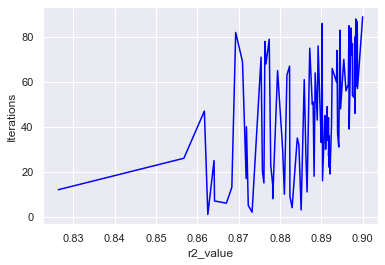

In [ ]:
sns.lineplot(mgd_results['r2_value'], mgd_results['Iterations'], color='blue')

## Using SGDRegressor:

In [ ]:
from sklearn.linear_model import SGDRegressor
sgdmodel = SGDRegressor(max_iter=5000, alpha=0.1, tol=0.000001)
sgdmodel.fit(X_train, y_train)
print('Coefficients = w[] = ', sgdmodel.coef_)
print('Intercept = w0 = ', sgdmodel.intercept_)

Coefficients = w[] =  [ 50.0926514   47.44648091  39.59872923  67.15984572 101.35435522]
Intercept = w0 =  [373.14217162]


In [ ]:
sgdr_y_pred = sgdmodel.predict(X_test)
sgdr_mse = mean_squared_error(y_test, sgdr_y_pred)
sgdr_rmse = mean_squared_error(y_test, sgdr_y_pred , squared=False)
sgdr_r2 =  r2_score(y_test, sgdr_y_pred)
print("Mean squared error = %.2f" % sgdr_mse )
print("Root mean squared error = %.2f" %sgdr_rmse)
print('Variance score = %.2f' %sgdr_r2)

Mean squared error = 10673.77
Root mean squared error = 103.31
Variance score = 0.89


Comparing the results:

In [ ]:
results = {
    1:["Mini Batch GD", n_m[0][0], n_m[1][0], n_m[2][0], n_m[3][0], n_m[4][0], n_m[5][0]],
    2:["Stocastic GD",n_s[0][0], n_s[1][0], n_s[2][0], n_s[3][0], n_s[4][0], n_s[5][0]],
    3:["Gradient Descent",n[0][0], n[1][0], n[2][0], n[3][0], n[4][0], n[5][0]],
    4:["Normal Equations",model.intercept_[0] , model.coef_[0][0] , model.coef_[0][1] , model.coef_[0][2] , model.coef_[0][3] , model.coef_[0][4]],
    5:["SGD Regressor",sgdmodel.intercept_[0] , sgdmodel.coef_[0] , sgdmodel.coef_[1] , sgdmodel.coef_[2] , sgdmodel.coef_[3] , sgdmodel.coef_[4]],
}
coefficients = pd.DataFrame.from_dict(results,orient='index')

coefficients.columns = ["Algorithm","w0", "w1", "w2", "w3", "w4", "w5"]

coefficients

,Algorithm,w0,w1,w2,w3,w4,w5
1,Mini Batch GD,370.913851,954.466313,-492.885011,-400.045800,166.142606,105.642370
2,Stocastic GD,368.498912,978.475376,-485.502706,-428.244550,169.183520,100.895423
3,Gradient Descent,372.087046,966.231414,-503.842166,-396.591995,161.432717,108.256420
4,Normal Equations,372.086511,966.507434,-504.154376,-396.561996,161.435827,108.261267
5,SGD Regressor,373.142172,50.092651,47.446481,39.598729,67.159846,101.354355


Coefficient Comparision:

In [ ]:
errors = {
    1:["Mini Batch GD", mgd_mse, mgd_rmse, mgd_r2],
    2:["Stocastic GD",sgd_mse, sgd_rmse, sgd_r2],
    3:["Gradient Descent",gd_mse, gd_rmse, gd_r2],
    4:["Normal Equations",n_mse, n_rmse, n_r2],
    5:["SGD Regressor",sgdr_mse, sgdr_rmse, sgdr_r2]
}
scores = pd.DataFrame.from_dict(errors,orient='index')

scores.columns = ["Algorithm", "Mean Squared Error", "Root Mean Squared Error", "R2 Score"]

scores

,Algorithm,Mean Squared Error,Root Mean Squared Error,R2 Score
1,Mini Batch GD,9521.690264,97.579149,0.900023
2,Stocastic GD,9489.609320,97.414626,0.900360
3,Gradient Descent,9552.825697,97.738558,0.899696
4,Normal Equations,9552.624437,97.737528,0.899698
5,SGD Regressor,10673.768299,103.313931,0.887926


Accuracy Score Comparision:

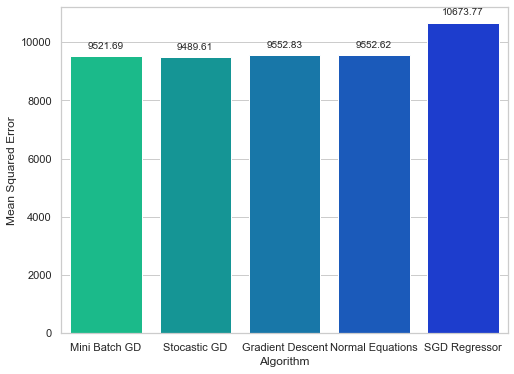

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
splot = sns.barplot(x='Algorithm', y='Mean Squared Error', data = scores, palette ='winter_r')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

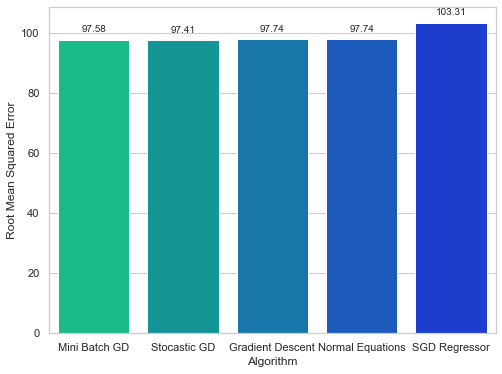

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
splot = sns.barplot(x='Algorithm', y='Root Mean Squared Error', data = scores, palette ='winter_r')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

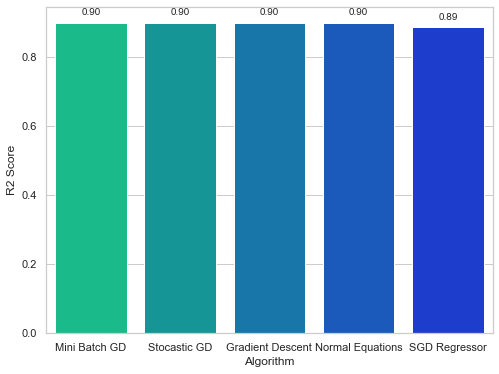

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
splot = sns.barplot(x='Algorithm', y='R2 Score', data = scores, palette ='winter_r')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Note:

All these algorithms can perfrom even better provided the learning rate and iterations are tuned to achieve the results. I have used the result from Sklearn Linear Regression as a baseline. I have tuned all my other algorithms so they are atleast as good as the model from sklearn.